# Classification Project

In [157]:
#Importing libraries
import pandas as pd
import pandas as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode

In [125]:
# Reading the training data set from local device and removing the empty column
df=pd.read_csv('/Users/afsoon/Documents/Data/DataScienceRoadmap/disease/Training.csv').dropna(axis=1)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


## Exploratory Data Analysis

In [126]:
df.shape

(4920, 133)

In [127]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [128]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


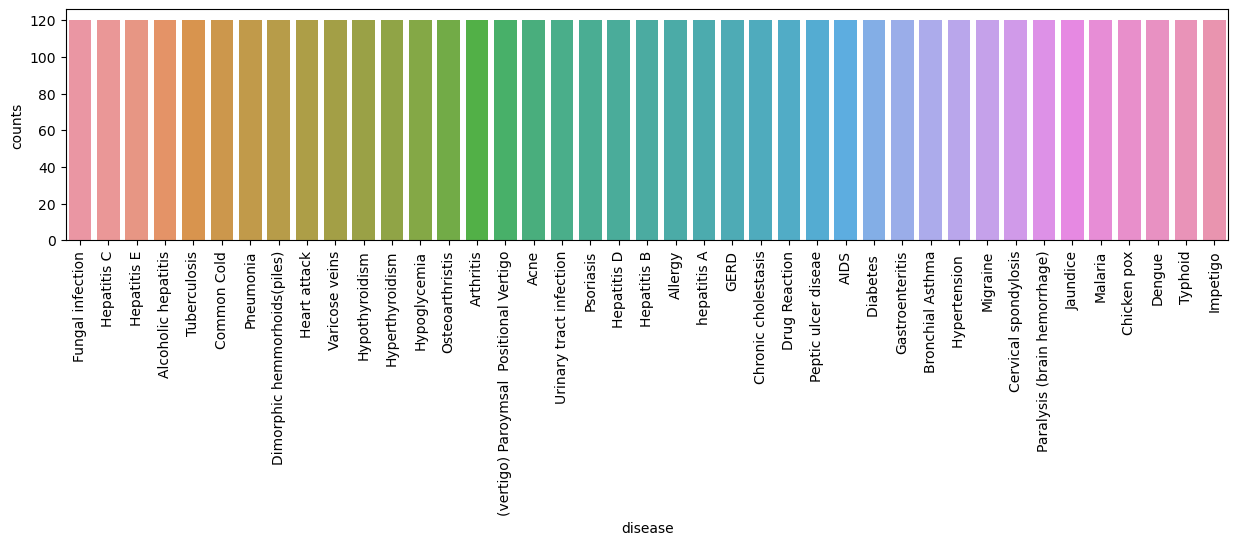

In [130]:
# Checking whether the dataset is balanced or not
diseas_count=df.prognosis.value_counts()
df_b=pd.DataFrame({'disease':diseas_count.index,'counts':diseas_count.values})

plt.figure(figsize=(15,3))
sns.barplot(x = "disease", y = "counts", data=df_b)
plt.xticks(rotation=90)
plt.show()
#plt.xticks() is a function used to customize the tick marks on the x-axis of a plot.

In [131]:
#there are exactly 120 samples for each disease, and no further balancing is required

In [132]:
# # Encoding the target value into numerical
# encoder=OneHotEncoder()

# prognosis_2d=df['prognosis'].values.reshape(-1, 1)
# #because the input of the OneHotEncoder should be a 2D array

# encoded_target=encoder.fit_transform(prognosis_2d)

# encoded_target_array = encoded_target.toarray()
# #convert the sparse matrix to a dense array

# df['prognosis']=encoded_target_array

In [135]:
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])

## Model Development

In [136]:
X=df.drop('prognosis',axis=1)
y=df['prognosis']

In [137]:
#Expliting our data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [138]:
rfc_model=RandomForestClassifier(random_state=18)
rfc_model.fit(X_train,y_train)
rfc_pred=rfc_model.predict(X_test)

In [139]:
svm_model=SVC()
svm_model.fit(X_train,y_train)
svm_pred=svm_model.predict(X_test)

In [140]:
gnb_model=GaussianNB()
gnb_model.fit(X_train,y_train)
gnb_pred=gnb_model.predict(X_test)

## Model Evaluation

In [191]:
print('Accuracy by Random Forest Classifier:')
print(f'training data: {accuracy_score(y_train,rfc_model.predict(X_train))}')
print(f'testing data: {accuracy_score(y_test,rfc_pred)}')
print('\n')
print('Accuracy by Support Vector Classifier:')
print(f'training data: {accuracy_score(y_train,svm_model.predict(X_train))}')
print(f'testing data: {accuracy_score(y_test,svm_pred)}')
print('\n')
print('Accuracy by Gaussian Navie Bayes:')
print(f'training data: {accuracy_score(y_train,gnb_model.predict(X_train))}')
print(f'testing data: {accuracy_score(y_test,gnb_pred)}')

Accuracy by Random Forest Classifier:
training data: 1.0
testing data: 1.0


Accuracy by Support Vector Classifier:
training data: 1.0
testing data: 1.0


Accuracy by Gaussian Navie Bayes:
training data: 1.0
testing data: 1.0


In [142]:
#all models are performing very well on the unseen data

## Model Development on the Test Dataset

In [149]:
#Training the models on the whole train data present in the dataset
final_rfc_model = RandomForestClassifier(random_state=18)
final_rfc_model.fit(X, y)

RandomForestClassifier(random_state=18)

In [143]:
final_svm_model = SVC()
final_svm_model.fit(X, y)

SVC()

In [150]:
final_gnb_model = GaussianNB()
final_gnb_model.fit(X, y)

GaussianNB()

In [148]:
#Reading the test dataset
test_df=pd.read_csv('/Users/afsoon/Documents/Data/DataScienceRoadmap/disease/Testing.csv')

test_X=test_df.drop('prognosis', axis=1)
test_y=encoder.transform(test_df['prognosis'])

In [202]:
#Predicting test dataset
final_rfc_pred=final_rfc_model.predict(test_X)
final_svm_pred=final_svm_model.predict(test_X)
final_gnb_pred=final_gnb_model.predict(test_X)

In [311]:
#To build a robust model we can combine all
#take mode of the predictions of all models so that even one model makes wrong, the final output would be correct
#This approach will help us to keep the predictions much more accurate on completely unseen data

final_pred=[mode([i,j,k])[0][0] for i,j,k in zip(final_rfc_pred, final_svm_pred, final_gnb_pred)]

/var/folders/sp/k50mgvkx4nd0myp63216r1rm0000gn/T/ipykernel_44481/132434044.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_pred=[mode([i,j,k])[0][0] for i,j,k in zip(final_rfc_pred, final_svm_pred, final_gnb_pred)]


## Model Evaluation on the Test Dataset

In [205]:
print('Accuracy by combined model:')
print(f'testing data: {accuracy_score(test_y,final_pred)}')

Accuracy by combined model:
testing data: 1.0


In [ ]:
#Combined model has classified all the data points accurately

Text(0.5, 1.0, 'Confusion Matrix for Combined Model on Test Dataset')

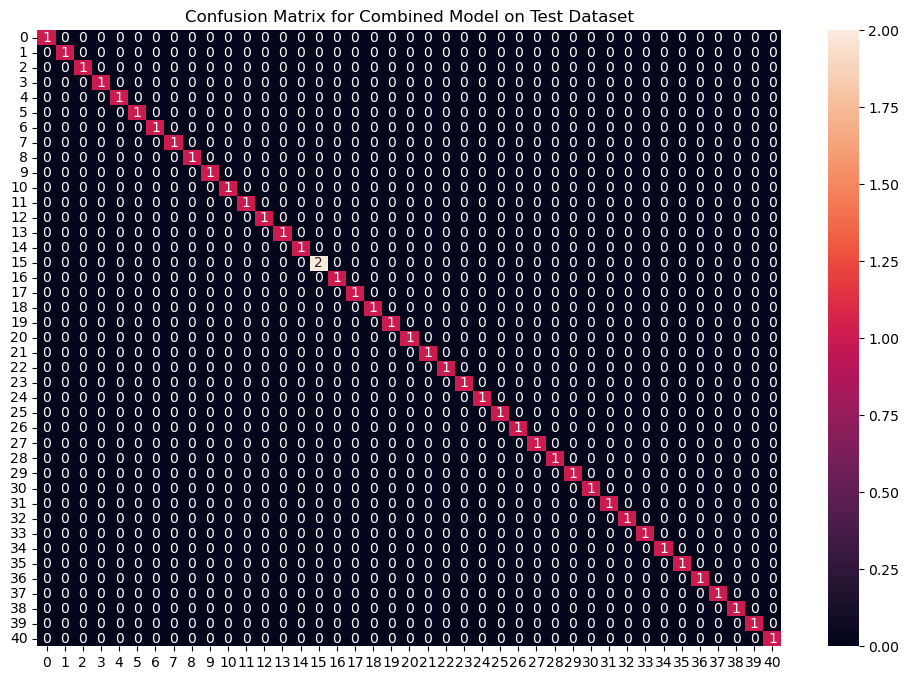

In [206]:
#Ploting confusion matrix to see the combined model accuracy
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(test_y,final_pred),annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")

## Disease Prediction Function

In [363]:
#creating a list of features without "_" and with capital letter
all_symptoms=X.columns.values

symptom_list=[]
for all_symptom in all_symptoms:
    b=" ".join([i.capitalize()for i in all_symptom.split('_')])
    symptom_list.append(b)

In [364]:
#Creating a dictionary with features as keys and zero as values
symptom_dict={} 
for key in symptom_list:
    symptom_dict[key]=0

In [365]:
#Defining the Function
#Input: string containing symptoms separated by commas
#Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms=symptoms.split(",")
    
    #Creating input data for the models
    #Reshaping the input data to be suitable for using in model predictions
    for key in symptoms:
        symptom_dict[key]=1
        x_new=np.array([value for value in symptom_dict.values()]).reshape(1, -1)
        
    #Generating individual outputs
    #Making final prediction by taking mode of all predictions    
    rfc_prediction=final_rfc_model.predict(x_new)
    svm_prediction=final_svm_model.predict(x_new)
    gnb_prediction=final_gnb_model.predict(x_new)
    final_prediction=mode([rfc_prediction,svm_prediction,gnb_prediction], axis=None, keepdims=True)[0][0]
    
    #Using .classes_ to get disease name instead of a number
    predictions = {
        "rfc_model_prediction": encoder.classes_[rfc_prediction][0],
        "svm_model_prediction": encoder.classes_[svm_prediction][0],
        "naive_bayes_prediction": encoder.classes_[gnb_prediction][0],
        "final_prediction": encoder.classes_[final_prediction]
    }
    return predictions

In [366]:
#Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rfc_model_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


/Users/afsoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/afsoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/afsoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Users/afsoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
